In [ ]:
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np

In [ ]:
test = pd.read_csv('test.csv') 
train = pd.read_csv('train.csv')

In [ ]:
df = pd.merge(test,train)

In [ ]:
y = test.merge(df,on='PassengerId', how = 'right')
df = train.append(y)

In [ ]:
df.groupby('Sex')['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

Мужчины и женщины на титанике

In [ ]:
df.groupby('Pclass')['PassengerId'].count()

Pclass
1.0    216
2.0    184
3.0    491
Name: PassengerId, dtype: int64

Билеты

In [ ]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df[train.Age==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_y,Name_y,Sex_y,Age_y,SibSp_y,Parch_y,Ticket_y,Fare_y,Cabin_y,Embarked_y
58,59,1,2.0,"West, Miss. Constance Mirium",female,5.0,1.0,2.0,C.A. 34651,27.7500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,234,1,3.0,"Asplund, Miss. Lillian Gertrud",female,5.0,4.0,2.0,347077,31.3875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,449,1,3.0,"Baclini, Miss. Marie Catherine",female,5.0,2.0,1.0,2666,19.2583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,778,1,3.0,"Emanuel, Miss. Virginia Ethel",female,5.0,0.0,0.0,364516,12.4750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ребятки живы! Статистика тарифов билетов 

In [ ]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Братья и сестры

In [ ]:
df.SibSp.unique()

array([1., 0., 3., 4., 2., 5., 8.])

In [ ]:
df.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [ ]:
train.SibSp.describe()
test.SibSp.describe()

count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

Родители детей

In [ ]:
df.Parch.unique()

array([0., 1., 2., 5., 3., 4., 6.])

In [ ]:
df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [ ]:
men = df[df.Sex == "male"] 
women = df[df.Sex == "female"]

In [ ]:
df.Age = df.Age.fillna(df.Age.mean())
df.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
df = df.drop(labels=['Cabin','Name','Ticket','Embarked'], axis=1)

Диаграммы (

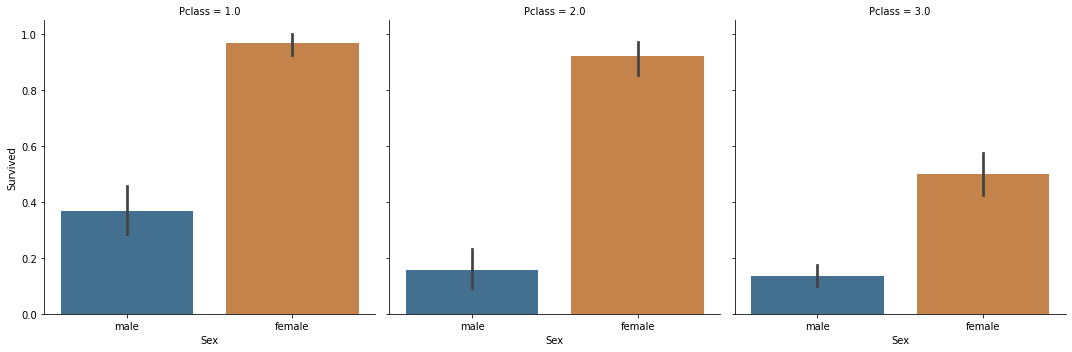

In [ ]:
sns.catplot(data = df,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5)

Наблюдаем, что пассажиров первого класса спаслось больше

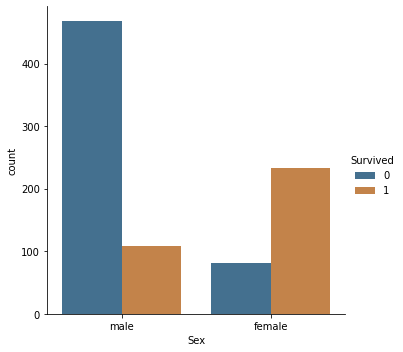

In [ ]:
sns.catplot(data = df,hue = 'Survived', x = 'Sex',
            kind='count', saturation=0.5)

Выжили ли богатенькие?

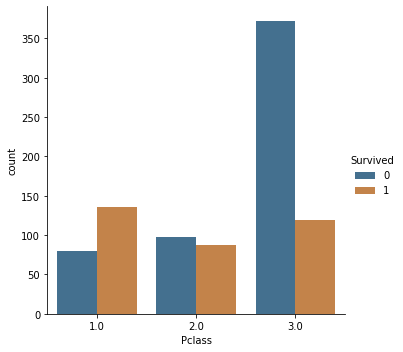

In [ ]:
sns.catplot(data = df,hue = 'Survived', x = 'Pclass',
            kind='count', saturation=0.5)

По итогу мы видем, что большинство погибших это пассажиры-3 класса, а наибольшее выживших в 1 классе

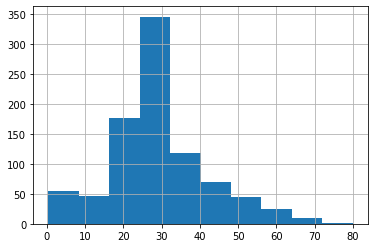

In [ ]:
df.Age.hist()

Тут видно, что погибло больше всего людей которым 30 лет

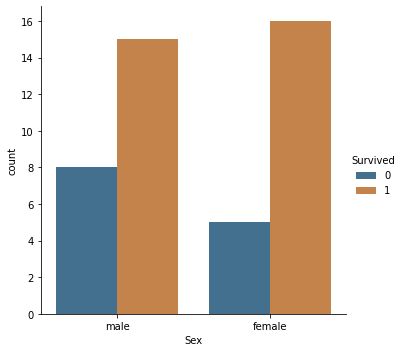

In [ ]:
child= df[df.Age<6]
sns.catplot(data = child,hue = 'Survived', 
            x = 'Sex',kind='count', saturation=0.5)

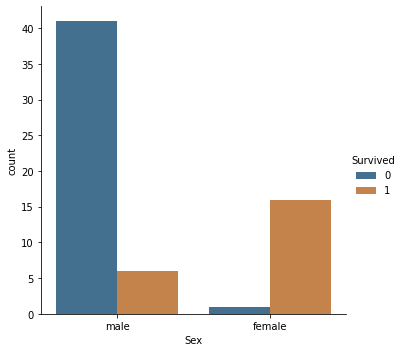

In [ ]:
grand= df[df.Age>50]
sns.catplot(data = grand,hue = 'Survived', 
            x = 'Sex',kind='count', saturation=0.5)

Короче говоря, понятно, что спасали детей и женщин. Так же, есть зависимость в возрасте (у стареньких шанс умереть больше)